# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

In [167]:
import pandas as pd
import numpy as np

#открытие файла и просмотр

data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t', decimal=' ')

print(data.head(10))

   total_images  last_price total_area first_day_exposition  rooms  \
0            20  13000000.0      108.0  2019-03-07T00:00:00      3   
1             7   3350000.0       40.4  2018-12-04T00:00:00      1   
2            10   5196000.0       56.0  2015-08-20T00:00:00      2   
3             0  64900000.0      159.0  2015-07-24T00:00:00      3   
4             2  10000000.0      100.0  2018-06-19T00:00:00      2   
5            10   2890000.0       30.4  2018-09-10T00:00:00      1   
6             6   3700000.0       37.3  2017-11-02T00:00:00      1   
7             5   7915000.0       71.6  2019-04-18T00:00:00      2   
8            20   2900000.0      33.16  2018-05-23T00:00:00      1   
9            18   5400000.0       61.0  2017-02-26T00:00:00      3   

  ceiling_height floors_total living_area  floor is_apartment  ...  \
0            2.7         16.0        51.0      8          NaN  ...   
1            NaN         11.0        18.6      1          NaN  ...   
2            NaN   

После открытия файла и предварительно просмотра первых 10 строчек можно увидеть,что данные содержат пропуски в столбцах: **ceiling_height, living_area, is_apartment, kitchen_area, balcony, airports_nearest, cityCenters_nearest** и во всех оставшихся. 

In [168]:
#посмотрим информацию о данных
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   total_images          23699 non-null  int64 
 1   last_price            23699 non-null  object
 2   total_area            23699 non-null  object
 3   first_day_exposition  23699 non-null  object
 4   rooms                 23699 non-null  int64 
 5   ceiling_height        14504 non-null  object
 6   floors_total          23613 non-null  object
 7   living_area           21796 non-null  object
 8   floor                 23699 non-null  int64 
 9   is_apartment          2775 non-null   object
 10  studio                23699 non-null  bool  
 11  open_plan             23699 non-null  bool  
 12  kitchen_area          21421 non-null  object
 13  balcony               12180 non-null  object
 14  locality_name         23650 non-null  object
 15  airports_nearest      18157 non-null

Теперь видно, что некоторые столбцы имеют другие типы значений, нежели должны. Например, столбцы **last_price, total_area, ceiling_height, floors_total, living_area** должны иметь числовое значение, а имеют строковое.
Кроме этого **cityCenters_nearest, parks_around3000 и ponds_around3000** имеют неправильные названия.

Кроме всего прочего у нас есть различия количества данных в разных столбцах, значит у нас есть факт пропусков. 

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'floor'}>, <AxesSubplot:>]],
      dtype=object)

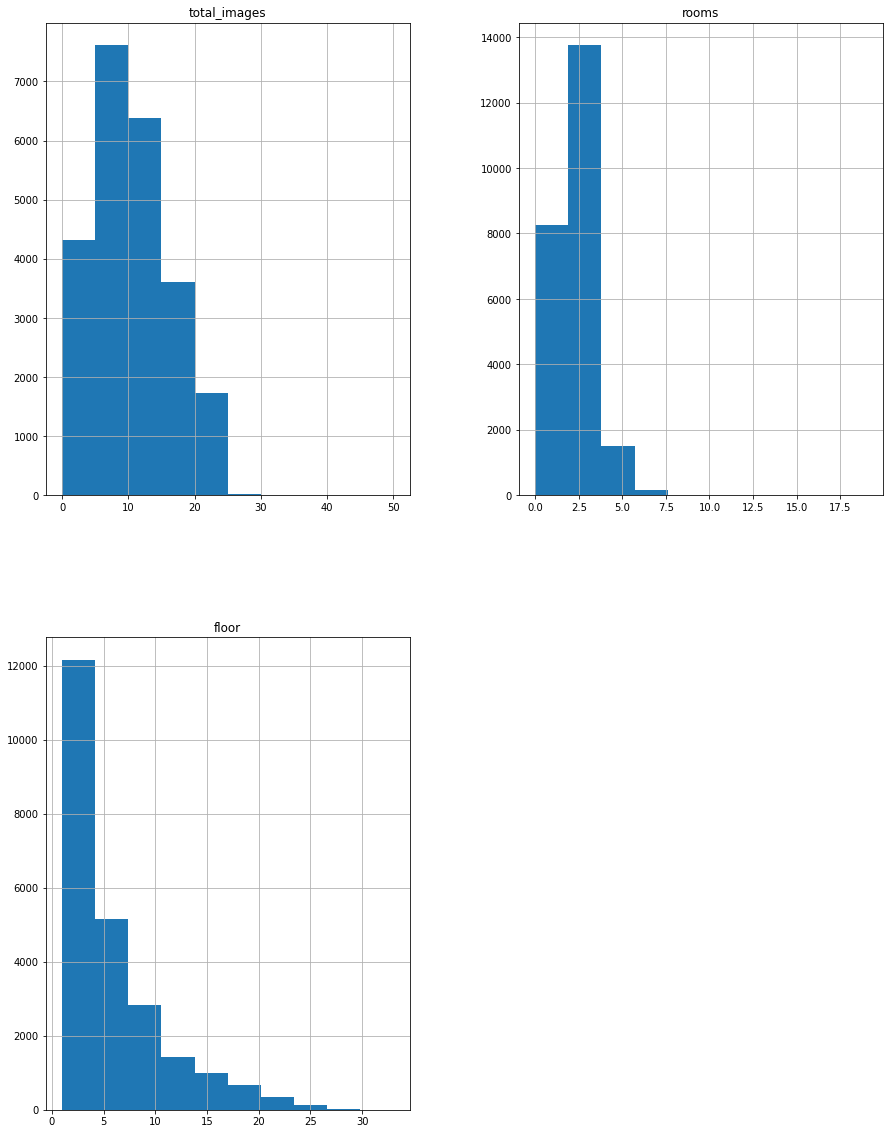

In [169]:
#построим гистрограмму для всех числовых значений таблицы

data.hist(figsize=(15, 20))

* По гистограмме **total_images** можно увидеть, что больше всего квартир имеет 5-10 фотографий, меньше всего 25-30.
* По гистограмме **rooms** можно увидеть, что больше всего квартир с 2-3 комнатами, а меньше всего от 6.
* По гистограмме **floor** можно увидеть, что больше всего квартир продается на 1-4 этажах, меньше всего с 26.

### Предобработка данных

In [170]:
#посмотрим информацию о данных
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   total_images          23699 non-null  int64 
 1   last_price            23699 non-null  object
 2   total_area            23699 non-null  object
 3   first_day_exposition  23699 non-null  object
 4   rooms                 23699 non-null  int64 
 5   ceiling_height        14504 non-null  object
 6   floors_total          23613 non-null  object
 7   living_area           21796 non-null  object
 8   floor                 23699 non-null  int64 
 9   is_apartment          2775 non-null   object
 10  studio                23699 non-null  bool  
 11  open_plan             23699 non-null  bool  
 12  kitchen_area          21421 non-null  object
 13  balcony               12180 non-null  object
 14  locality_name         23650 non-null  object
 15  airports_nearest      18157 non-null

Итак, просмотрев снова общую информацию по данным, можно увидеть, что пропуски есть в следующих столбцах: **ceiling_height, floors_total, living_area, is_apartment, kitchen_area, balcony, locality_name, airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest, days_exposition.**
Нужно посмотреть на характер пропусков и понять, возможно ли их изменить.


**1. Столбец ceiling_height**. 

In [171]:
#посмотрим на пустые значения в первом столбце с пропусками ceiling_height
data['ceiling_height'].isna().sum()

9195

Получается, что в 9195 строчках из 23699 есть пропуски. Это достаточно много. Стоит посмотреть, какие значения имеются в таблице вообще.

In [172]:
# просмотр значений столбца ceiling_height
data['ceiling_height'].value_counts()

2.5     3515
2.6     1646
2.7     1574
3.0     1112
2.8      993
        ... 
5.0        1
4.9        1
3.43       1
3.83       1
2.25       1
Name: ceiling_height, Length: 183, dtype: int64

Итак, больше всего значений у нас в промежутке от 2,5 до 3 метров, а вот дальше значения меняются. Посмотрим на эти значения.

In [173]:
#уникальные значения столбца ceiling_height
print(data['ceiling_height'].unique())

['2.7' nan '3.03' '2.5' '2.67' '2.56' '3.05' '2.75' '2.6' '2.9' '2.8'
 '2.55' '3.0' '2.65' '3.2' '2.61' '3.25' '3.45' '2.77' '2.85' '2.64'
 '2.57' '4.15' '3.5' '3.3' '2.71' '4.0' '2.47' '2.73' '2.84' '3.1' '2.34'
 '3.4' '3.06' '2.72' '2.54' '2.51' '2.78' '2.76' '25.0' '2.58' '3.7'
 '2.52' '5.2' '2.87' '2.66' '2.59' '2.0' '2.45' '3.6' '2.92' '3.11' '3.13'
 '3.8' '3.15' '3.55' '3.16' '3.62' '3.12' '2.53' '2.74' '2.96' '2.46'
 '5.3' '5.0' '2.79' '2.95' '4.06' '2.94' '3.82' '3.54' '3.53' '2.83' '4.7'
 '2.4' '3.38' '3.01' '5.6' '3.65' '3.9' '3.18' '3.35' '2.3' '3.57' '2.48'
 '2.62' '2.82' '3.98' '2.63' '3.83' '3.52' '3.95' '3.75' '2.88' '3.67'
 '3.87' '3.66' '3.85' '3.86' '4.19' '3.24' '4.8' '4.5' '4.2' '3.36' '32.0'
 '3.08' '3.68' '3.07' '3.37' '3.09' '8.0' '3.26' '3.34' '2.81' '3.44'
 '2.97' '3.14' '4.37' '2.68' '3.22' '3.27' '27.0' '4.1' '2.93' '3.46'
 '24.0' '3.47' '3.33' '3.63' '3.32' '26.0' '1.2' '8.3' '2.98' '2.86'
 '3.17' '4.4' '3.28' '3.04' '4.45' '5.5' '3.84' '3.23' '3.02' '3.21'


Значения разнообразны. Видимо, в базе не только квартиры, так как потолки есть и 100 метров, но это могут быть и аномалии. Заполнить  все пропуски логически не получается, так как непонятно, где именно у нас квартира, а где склад, есть ли помещение с потолками в 100м или же это опечатка, тогда высота потолка 1м? Природа таких пропусков до конца непонятна. Возможно, это произошло из-за отсутствия информации у клиента, поскольку он даже и не думал на эту тему. Вероятно, правильнее будет заполнить эти пропуски медианным значения, но после того, как найдутся аномалии.


**2. Столбец floors_total**

In [174]:
#посмотрим на пустые значения в столбце с пропусками floors_total
data['floors_total'].isna().sum()

86

В данном столбце пропусков значительно меньше, всего 86.

In [175]:
data['floors_total'].value_counts().head()

5.0     5788
9.0     3761
16.0    1376
12.0    1362
4.0     1200
Name: floors_total, dtype: int64

Больше всего данных по 5- этажным зданиям, но кроме них есть и 60, 36 и т.д. Может это ошибка?

In [176]:
#уникальные значения столбца floors_total
print(data['floors_total'].unique())

['16.0' '11.0' '5.0' '14.0' '12.0' '26.0' '24.0' '27.0' '9.0' '6.0' '17.0'
 '25.0' '3.0' '23.0' '19.0' '18.0' '4.0' '22.0' '8.0' '2.0' '10.0' '7.0'
 '13.0' '15.0' nan '20.0' '28.0' '36.0' '21.0' '35.0' '34.0' '60.0' '1.0'
 '29.0' '33.0' '52.0' '37.0']


На текущий момент правильно заполнить пропуски в этажности здания не предоставляется возможным. Можно было бы заполнить этажность по этажу квартиры, выставленной на продажу, но тогда информация о здании будет сильно изкажена. Но это всего лишь 86 записей из 23699,  что составляет меньше процента. Поэтому так и сделаем. Причин для таких пропусков может быть как незнание самих клиентов о полной этажности здания, либо совпадение этажа и этажности.

In [177]:
#заполнение пропусков в этажности этажом квартиры
data['floors_total'].fillna(data['floor'], inplace=True)

#проверка остатков пропусков
data['floors_total'].isna().sum()

0

**3. Столбец living_area**

In [178]:
#посмотрим на пустые значения в столбце с пропусками living_area
data['living_area'].isna().sum()

1903

In [179]:
# просмотр значений столбца living_area
data['living_area'].value_counts()

18.0     882
17.0     675
30.0     598
16.0     486
20.0     481
        ... 
13.15      1
20.39      1
25.41      1
31.29      1
154.0      1
Name: living_area, Length: 1782, dtype: int64

Пропусков в данном столбце получается 1903, что составляет около 8 процентов базы. Причины могут быть разные, например: отсутствие точных данных у клиента или отсустсвие документов с точными данными. Правильно заполнить возможно медианным значением по количеству комнат.

**4. is_apartment**

In [180]:
#посмотрим на пустые значения в столбце с пропусками is_apartment
data['is_apartment'].isna().sum()

20924

In [181]:
# просмотр значений столбца living_area
data['is_apartment'].value_counts()

False    2725
True       50
Name: is_apartment, dtype: int64

In [182]:
#уникальные значения столбца is_apartment
print(data['is_apartment'].unique())

[nan False True]


Видно, что пропуски есть в записях, которые имеют значени 0 или False. Есть смысл заменить эти пропуски и проверить.

In [183]:
#замена пропусков значением False
data['is_apartment'] = data['is_apartment'].fillna(False)

#проверка замены
data['is_apartment'].isna().sum()

0

**5. kitchen_area**

In [184]:
#посмотрим на пустые значения в первом столбце с пропусками kitchen_area
data['kitchen_area'].isna().sum()

2278

Пропусков достаточно много, возможно, из-за отсутствия информации у владельца. Заполнить пропуски возможно медианным значением.

**6. balcony**

In [185]:
#посмотрим на пустые значения в столбце с пропусками balcony
data['balcony'].isna().sum()

11519

In [186]:
# просмотр значений столбца balcony
data['balcony'].value_counts()

1.0    4195
0.0    3758
2.0    3659
5.0     304
4.0     183
3.0      81
Name: balcony, dtype: int64

In [187]:
#уникальные значения столбца balcony
print(data['balcony'].unique())

[nan '2.0' '0.0' '1.0' '5.0' '4.0' '3.0']


Данные пропущены скорее всего из-за отсутствия балкона у клиента. Поэтому логичнее всего заменить эти пропуски нулевым значением.

In [188]:
#замена пустых значений на 0 и проверка
data['balcony'] = data['balcony'].fillna(0.0)
data['balcony'] = data['balcony'].replace(0.0, '0.0')

data['balcony'].isna().sum()


0

**7. locality_name**

In [189]:
#посмотрим на пустые значения в столбце с пропусками locality_name
data['locality_name'].isna().sum()

49

In [190]:
# просмотр значений столбца locality_name
data['locality_name'].value_counts()

Санкт-Петербург           15721
посёлок Мурино              522
посёлок Шушары              440
Всеволожск                  398
Пушкин                      369
                          ...  
поселок Жилпосёлок            1
посёлок Высокоключевой        1
посёлок Плоское               1
деревня Вахнова Кара          1
деревня Нижние Осельки        1
Name: locality_name, Length: 364, dtype: int64

Пропусков достаточно мало, возможно они связаны с отсутствием информации об этом в объявлении либо с совпадением информации с центральным городом Санкт-Петербург. Можно было бы заполнить информацию, исходя из присутствия аэропортов рядом и их расстоянием от города. Заполним пропуски строчкой "Санкт-петербург".

In [191]:
#заполнение пропусков строчкой "Санкт-Петербург"
data['locality_name'] = data['locality_name'].fillna('Санкт-Петербург')

#проверка
data['locality_name'].isna().sum()

0

**8. airports_nearest**

In [192]:
#посмотрим на пустые значения в столбце с пропусками airports_nearest
data['airports_nearest'].isna().sum()

5542

Пропусков достаточно много. Они могут быть связаны с неверным указанием места нахождения квартиры в столбце **locality_name**. Заполнить пропуска нет возможности.

**9. cityCenters_nearest**

In [193]:
#посмотрим на пустые значения в столбце с пропусками cityCenters_nearest
data['cityCenters_nearest'].isna().sum()

5519

In [194]:
data['cityCenters_nearest'].value_counts()

8460.0     61
20802.0    32
10720.0    30
8434.0     27
20444.0    27
           ..
33508.0     1
10502.0     1
15813.0     1
14663.0     1
5489.0      1
Name: cityCenters_nearest, Length: 7642, dtype: int64

Пропусков достаточно много. Они могут быть связаны с неверным указанием места нахождения квартиры в столбце **locality_name**. Заполнить пропуски нет возможности.

**10. parks_around3000**

In [195]:
#посмотрим на пустые значения в первом столбце с пропусками parks_around3000
data['parks_around3000'].isna().sum()

5518

In [196]:
#уникальные значения в столбце parks_around3000
print(data['parks_around3000'].unique())

['1.0' '0.0' '2.0' nan '3.0']


Пропусков достаточно много. Скорее всего они связаны либо с полным отсутствием парков рядом, отсустствием такой информации в базе или с неверным названием местности в столбце **locality_name**. Логично предположить, что если есть данные о ближайшем парке в столбце **parks_nearest**, то в этом столбце должно быть значение хотя бы 1. Сначала заполним пропуски значением "0,0", а после проверим, есть ли возле них ближайшие парки. Посмотрим, есть ли такие.

In [197]:
#заполнение пропусков
data['parks_around3000'] = data['parks_around3000'].fillna('0.0')

#проверка исправлений и пропусков
data['parks_around3000'].isna().sum()

#есть ли парки в записях с нулевым значением
print(data[(data['parks_around3000'] == '0.0') & (data['parks_nearest'] >= '0.0')])

       total_images  last_price total_area first_day_exposition  rooms  \
1590              3   7500000.0       70.0  2017-07-11T00:00:00      2   
10959             9   3000000.0       31.1  2017-03-21T00:00:00      1   
19208            17  14950000.0      187.0  2017-10-12T00:00:00      5   
19430             9   3900000.0       30.5  2018-02-22T00:00:00      1   

      ceiling_height floors_total living_area  floor  is_apartment  ...  \
1590             NaN         18.0        37.0     13         False  ...   
10959            NaN          5.0        17.7      2         False  ...   
19208            3.0          2.0        80.0      2         False  ...   
19430            2.6          5.0        16.5      1         False  ...   

       kitchen_area  balcony    locality_name airports_nearest  \
1590           10.0      0.0  Санкт-Петербург          14878.0   
10959           5.5      0.0  Санкт-Петербург          14821.0   
19208          17.0      1.0  Санкт-Петербург          

Записей с 0 парков в радиусе 3км, но с ближайшим парком есть 4 штуки. Пока оставим как есть.

**11. parks_nearest**

In [198]:
#посмотрим на пустые значения в столбце с пропусками parks_nearest
data['parks_nearest'].isna().sum()

15620

Пропусков достаточно много. Скорее всего они связаны либо с полным отсутствием парков рядом, отсустствием такой информации в базе или с неверным названием местности в столбце **locality_name**. Заполнить пропуски нет возможности. 

**12. ponds_around3000**

In [199]:
#посмотрим на пустые значения в столбце с пропусками ponds_around3000
data['ponds_around3000'].isna().sum()

5518

In [200]:
print(data['ponds_around3000'].unique())

['2.0' '0.0' '3.0' '1.0' nan]


Пропусков достаточно много. Скорее всего они связаны либо с полным отсутствием прудов рядом, отсустствием такой информации в базе или с неверным названием местности в столбце **locality_name**. Логично предположить, что если есть данные о ближайшем пруде в столбце **ponds_nearest**, то в этом столбце должно быть значение хотя бы 1. Сначала заполним пропуски значением "0,0", а после проверим, есть ли возле них ближайшие пруды. Посмотрим, есть ли такие.

In [201]:
#заполнение пропусков значением "0,0"
data['ponds_around3000'] = data['ponds_around3000'].fillna("0.0")

#проверка
data['ponds_around3000'].isna().sum()

#есть ли пруды в записях с нулевым значением
print(data[(data['ponds_around3000'] == '0.0') & (data['ponds_nearest'] >= '0.0')])

Empty DataFrame
Columns: [total_images, last_price, total_area, first_day_exposition, rooms, ceiling_height, floors_total, living_area, floor, is_apartment, studio, open_plan, kitchen_area, balcony, locality_name, airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest, days_exposition]
Index: []

[0 rows x 22 columns]


Таких нет.

**13. ponds_nearest**

In [202]:
#посмотрим на пустые значения в первом столбце с пропусками ponds_nearest
data['ponds_nearest'].isna().sum()

14589

Пропусков достаточно много. Скорее всего они связаны либо с полным отсутствием прудов рядом, отсустствием такой информации в базе или с неверным названием местности в столбце **locality_name**. Заполнить пропуски нет возможности. 

**14. days_exposition**

In [203]:
#посмотрим на пустые значения в столбце с пропусками days_exposition
data['days_exposition'].isna().sum()

3181

Пропусков достаточно много. Возможно некоторые лоты уже были проданы, поэтому и дня не прошло. Поэтому есть смысл заменить пока эти пропуски хотя бы значением 1.

In [135]:
#замена пропусков на 1
#data['days_exposition'] = data['days_exposition'].fillna(1)

#проверка изменений
#data['days_exposition'].isna().sum()

0

In [231]:
#data['days_exposition'] = pd.to_numeric(data['days_exposition'])
#data['days_exposition'] = data['days_exposition'].astype('int')
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
data['year'] = data['first_day_exposition'].dt.year 

days = data[data['days_exposition'].isna()]
days.groupby('year').count()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
year,,,,,,,,,,,,,,,,,,,,,
2014,18,18,18,18,18,11,18,18,18,18,...,18,18,18,15,15,18,12,18,4,0
2015,70,70,70,70,70,50,70,65,70,70,...,64,70,70,59,59,70,37,70,38,0
2016,67,67,67,67,67,57,67,66,67,67,...,65,67,67,46,46,67,27,67,21,0
2017,271,271,271,271,271,204,271,252,271,271,...,251,271,271,204,204,271,132,271,131,0
2018,959,959,959,959,959,748,959,903,959,959,...,901,959,959,661,663,959,342,959,357,0
2019,1796,1796,1796,1796,1796,1383,1796,1679,1796,1796,...,1679,1796,1796,1329,1328,1796,595,1796,665,0


* **Изменение типа данных**

In [136]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   total_images          23699 non-null  int64 
 1   last_price            23699 non-null  object
 2   total_area            23699 non-null  object
 3   first_day_exposition  23699 non-null  object
 4   rooms                 23699 non-null  int64 
 5   ceiling_height        14504 non-null  object
 6   floors_total          23699 non-null  object
 7   living_area           21796 non-null  object
 8   floor                 23699 non-null  int64 
 9   is_apartment          23699 non-null  bool  
 10  studio                23699 non-null  bool  
 11  open_plan             23699 non-null  bool  
 12  kitchen_area          21421 non-null  object
 13  balcony               23699 non-null  object
 14  locality_name         23699 non-null  object
 15  airports_nearest      18157 non-null

По информации видны следующие столбцы с неверным типом данных:

* last_price - строковое, должно быть типа float, так как это цена.
* total_area - строковое, должно быть типа float, так как площадь измеряется в метрах.
* first_day_exposition - строковое, должно быть датой, так как это дата публикация.
* ceiling_height - строковое, должно быть типа float, так как высота потолков измеряется в метрах.
* floors_total - строковое, должно быть типа int, так как этажность дома указывается в целых числах.
* living_area - строковое, должно быть типа float, так как площадь измеряется в метрах. 
* kitchen_area - строковое, должно быть типа float, так как площадь измеряется в метрах.
* balcony - строковое, должно быть типа int, так как число балконов выражается целым числом.
* airports_nearest - строковое, должно быть типа float, так как расстояние в метрах.
* cityCenters_nearest - строковое, должно быть типа float, так как расстояние в метрах.
* parks_around3000 - строковое, должно быть типа int, так как количество парков в единицах.
* parks_nearest - строковое, должно быть типа float, так как расстояние в метрах.
* ponds_around3000 - строковое, должно быть типа int, так как количество прудов в единицах.
* ponds_nearest - строковое, должно быть типа float, так как расстояние в метрах.
* days_exposition - строковое, должно быть типа int, так как количество в днях.

In [137]:
#изменение типа данных в столбце last_price
data['last_price'] = pd.to_numeric(data['last_price'])

#изменение типа данных в столбце total_area
data['total_area'] = pd.to_numeric(data['total_area'])

#изменение типа данных в столбце first_day_exposition
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

#изменение типа данных в столбце ceiling_height
data['ceiling_height'] = pd.to_numeric(data['ceiling_height'])

#изменение типа данных в столбце floors_total
data['floors_total'] = pd.to_numeric(data['floors_total'])
data['floors_total'] = data['floors_total'].astype('int')

#изменение типа данных в столбце living_area
data['living_area'] = pd.to_numeric(data['living_area'])

#изменение типа данных в столбце kitchen_area
data['kitchen_area'] = pd.to_numeric(data['kitchen_area'])

#изменение типа данных в столбце balcony
data['balcony'] = pd.to_numeric(data['balcony'])
data['balcony'] = data['balcony'].astype('int')

#изменение типа данных в столбце airports_nearest
data['airports_nearest'] = pd.to_numeric(data['airports_nearest'])

#изменение типа данных в столбце cityCenters_nearest
data['cityCenters_nearest'] = pd.to_numeric(data['cityCenters_nearest'])

#изменение типа данных в столбце parks_around3000
data['parks_around3000'] = pd.to_numeric(data['parks_around3000'])
data['parks_around3000'] = data['parks_around3000'].astype('int')

#изменение типа данных в столбце parks_nearest
data['parks_nearest'] = pd.to_numeric(data['parks_nearest'])

#изменение типа данных в столбце ponds_around3000
data['ponds_around3000'] = pd.to_numeric(data['ponds_around3000'])
data['ponds_around3000'] = data['ponds_around3000'].astype('int')

#изменение типа данных в столбце ponds_nearest
data['ponds_nearest'] = pd.to_numeric(data['ponds_nearest'])

#изменение типа данных в столбце days_exposition
data['days_exposition'] = pd.to_numeric(data['days_exposition'])
data['days_exposition'] = data['days_exposition'].astype('int')


* **Выявление и изучение уникальных значений в названиях. Устранение дубликатов**


In [138]:
#выявление уникальных значений в столбце locality_name
print(data['locality_name'].unique())

['Санкт-Петербург' 'посёлок Шушары' 'городской посёлок Янино-1'
 'посёлок Парголово' 'посёлок Мурино' 'Ломоносов' 'Сертолово' 'Петергоф'
 'Пушкин' 'деревня Кудрово' 'Коммунар' 'Колпино'
 'поселок городского типа Красный Бор' 'Гатчина' 'поселок Мурино'
 'деревня Фёдоровское' 'Выборг' 'Кронштадт' 'Кировск'
 'деревня Новое Девяткино' 'посёлок Металлострой'
 'посёлок городского типа Лебяжье' 'посёлок городского типа Сиверский'
 'поселок Молодцово' 'поселок городского типа Кузьмоловский'
 'садовое товарищество Новая Ропша' 'Павловск' 'деревня Пикколово'
 'Всеволожск' 'Волхов' 'Кингисепп' 'Приозерск' 'Сестрорецк'
 'деревня Куттузи' 'посёлок Аннино' 'поселок городского типа Ефимовский'
 'посёлок Плодовое' 'деревня Заклинье' 'поселок Торковичи'
 'поселок Первомайское' 'Красное Село' 'посёлок Понтонный' 'Сясьстрой'
 'деревня Старая' 'деревня Лесколово' 'посёлок Новый Свет' 'Сланцы'
 'село Путилово' 'Ивангород' 'Мурино' 'Шлиссельбург' 'Никольское'
 'Зеленогорск' 'Сосновый Бор' 'поселок Новый Све

In [139]:
data['locality_name'].duplicated().sum()

23335

In [140]:
data['locality_name'] = data['locality_name'].str.replace('городской', "")
data['locality_name'] = data['locality_name'].str.replace('городского типа', '')
data['locality_name'] = data['locality_name'].str.replace('ё',"е")
data['locality_name'] = data['locality_name'].str.replace(' поселок',"поселок")
data['locality_name'] = data['locality_name'].str.replace('  '," ")
data['locality_name'] = data['locality_name'].str.replace('село Павлово',"поселок Павлово")
data['locality_name'] = data['locality_name'].str.lower()
data['locality_name'] = (data['locality_name'].str\
                         .replace('деревня федоровское', 'поселок федоровское').str
                         .replace('садовое товарищество новая ропша','поселок ропша').str
                         .replace('коттеджныйпоселок', 'поселок').str
                         .replace('деревня калитино','поселок калитино').str
                         .replace('деревня зимитицы','поселок зимитицы').str
                         .replace('поселок станции громово','поселок громово').str
                         .replace('деревня русско высоцк', 'село русско-высоцкое').str
                         .replace('село русско-село русско-высоцкоеое', 'село русско-высоцкое').str
                         .replace('поселокпоселок коммунарыы', 'поселок коммунары').str
                         .replace(' при железнодорожной станции ',' ').str
                         .replace('садовое товарищество приладожский', 'поселок приладожский').str
                         .replace('садовое товарищество рахья', 'поселок рахья').str
                         .replace(' станции ', " ").str
                         .replace('деревня щеглово', 'поселок щеглово').str
                         .replace('хапо-ое', 'хаповское').str
                         .replace('садоводческое некоммерческое товарищество ', '').str
                         .replace('поселок кингисеппский','кингисепп').str
                         .replace('кингисепп', 'поселок кингисеппский').str
                         .replace('поселок мурино', 'мурино').str
                         .replace('мурино', 'поселок мурино').str
                         .replace('деревня кудрово','кудрово').str
                         .replace('кудрово', 'деревня кудрово').str
                         .replace('село никольское', 'никольское').str
                         .replace('никольское', 'село никольское').str
                         .replace('поселок усть-луга', 'луга').str
                         .replace('луга', 'поселок усть-луга').str
                         .replace('деревня старые бегуницы', 'деревня бегуницы').str
                         .replace('деревня бегуницы', 'деревня старые бегуницы').str
                         .replace('поселок рабитицы', 'деревня рабитицы').str
                         .replace('поселок любань', 'любань').str
                         .replace('любань', 'поселок любань').str
                         .replace('поселок свирьстрой', 'поселок свирь').str
                         .replace('поселок свирь', 'поселок свирьстрой')
                        )
 
checked = set()
for s in data['locality_name'].unique():
    name = s.split(' ')[-1]
    if name != '' and not name in checked:
        checked.add(name)
        ss = data[data['locality_name'].str.contains(name)]['locality_name'].unique()
        if len(ss)>1:
            print(ss)

['коммунар' 'поселок коммунары']
['поселок красный бор' 'выборг' 'сосновый бор' 'деревня чудской бор'
 'деревня бор' 'деревня трубников бор' 'поселок пансионат зеленый бор'
 'деревня борисова грива']
['поселок шушары' 'поселок янино-1' 'поселок парголово' 'поселок мурино'
 'поселок красный бор' 'поселок федоровское' 'поселок металлострой'
 'поселок лебяжье' 'поселок сиверский' 'поселок молодцово'
 'поселок кузьмоловский' 'поселок ропша' 'поселок кингисеппский'
 'поселок аннино' 'поселок ефимовский' 'поселок плодовое'
 'поселок торковичи' 'поселок первомайское' 'красное село'
 'поселок понтонный' 'поселок новый свет' 'село путилово'
 'село никольское' 'поселок романовка' 'поселок бугры' 'поселок рощино'
 'поселок усть-луга' 'поселок павлово' 'поселок оредеж' 'село копорье'
 'поселок молодежное' 'поселок победа' 'поселок синявино'
 'поселок стрельна' 'поселок александровская' 'поселок терволово'
 'поселок советский' 'поселок петровское' 'поселок токсово'
 'поселок сельцо' 'поселок вырица

* **Найдите и устраните редкие и выбивающиеся значения**

In [141]:
print('до 2,5м: ' + str(data.query('ceiling_height < 2.5')['ceiling_height'].count()) + ' шт.')
print(' 4 до 5м: ' + str(data.query('ceiling_height > 4 and ceiling_height <= 5')['ceiling_height'].count()) + ' шт.')
print(' 5 до 25м: ' + str(data.query('ceiling_height > 5 and ceiling_height < 25')['ceiling_height'].count()) + ' шт.')
print(' 25м до 36м: ' + str(data.query('ceiling_height >= 25 and ceiling_height <= 36')['ceiling_height'].count()) + ' шт.')
print(' 25м до 36м: ' + str(data.query('ceiling_height > 36 and ceiling_height < 50')['ceiling_height'].count()) + ' шт.')
print(' от 50м: ' + str(data.query('ceiling_height >= 50')['ceiling_height'].count()) + ' шт.')


до 2,5м: 73 шт.
 4 до 5м: 39 шт.
 5 до 25м: 16 шт.
 25м до 36м: 19 шт.
 25м до 36м: 0 шт.
 от 50м: 1 шт.


Обычная высота потолков находится от 2,5 - 3,2 метрах. До 2,5 метров квартир немного, но квартиры ли это, непонятно, можно удалить. До 5 метров могут быть двухэтажные квартиры(их немного и можно удалить), 25 и 36 скорее всего опечатки, поэтому поделим их на 10. Все остальное является ошибками и подлежит удалению. Удаляем квартиры с высотой потолков от 36.

In [142]:
#удаление до 2,5
data.drop(index=data.query('ceiling_height < 2.5').index,inplace=True)

#удаление 4-25
data.drop(index=data.query('ceiling_height > 4 and ceiling_height < 25').index, inplace=True)

#даление от 36
data.drop(index=data.query('ceiling_height > 36').index, inplace=True)

#деление на 10
data.update(data[(data['ceiling_height'] >= 25) & (data['ceiling_height'] <= 36)]['ceiling_height']/10)

#заполнение пустых значений ceiling_height медианными в зависимости от месторасположения
for cei in data['total_area'].unique():
    data_tmp = data[data['total_area'] == cei]
    if data_tmp[data_tmp['ceiling_height'].notnull()].shape[0] > 0:
        cei_median = data.loc[data['total_area'] == cei]['ceiling_height'].median()
        data.loc[(data['ceiling_height'].isna()) & \
                 (data['total_area'] == cei), 'ceiling_height'] = cei_median

In [143]:
data['ceiling_height'].isna().sum()

634

In [144]:
#заполнение оставшихся пустых значений медианным
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())

In [145]:
#поиск редких значений в last_price и удаление их
print('цена 0:', data.query('last_price == 0')['last_price'].count())
print('ниже 100.000:', data.query('last_price < 1e+05')['last_price'].count())
print('больше 100.000.000:', data.query('last_price > 1e+08')['last_price'].count())

#удаление квартир
data.drop(index=data.query('last_price > 1e+08').index,inplace=True)

цена 0: 0
ниже 100.000: 1
больше 100.000.000: 33


Больше 100.000.000 33 штук. Возможно, это элитная недвижимость. Стоит это удалить, что и сделаем. Ниже 100.000 только одна квартира, ее трогать не будем.

In [146]:
print('площадь < 10 :',data.query('total_area < 10')['total_area'].count()) 
print('площадь > 500 :',data.query('total_area > 500')['total_area'].count())

площадь < 10 : 0
площадь > 500 : 2


Удаляем квартиры площадью более 500 кв.метров. Их немного.

In [147]:
#удаление квартир
data.drop(index=data.query('total_area > 500').index,inplace=True)

In [148]:
#заполнение пустых значений в столбце kitchen_area медианным
data['kitchen_area'] = data['kitchen_area'].fillna(data['kitchen_area'].median())

#заполнение пустых значений airports_nearest медианными в зависимости от месторасположения
for air in data['locality_name'].unique():
    data_tmp = data[data['locality_name'] == air]
    if data_tmp[data_tmp['airports_nearest'].notnull()].shape[0] > 0:
        air_median = data.loc[data['locality_name'] == air]['airports_nearest'].median()
        data.loc[(data['airports_nearest'].isna()) & \
                 (data['locality_name'] == air), 'airports_nearest'] = air_median

#оставшиеся заполняем 0, так как скорее всего аэропортов просто нет рядом
data['airports_nearest'] = data['airports_nearest'].fillna(0)

#уникальные значения cityCenters_nearest
data['cityCenters_nearest'].unique()
data['cityCenters_nearest'].value_counts()
data['cityCenters_nearest'].isna().sum()

#заполнение пустых значений cityCenters_nearest медианными в зависимости от месторасположения
for city in data['locality_name'].unique():
    data_tmp = data[data['locality_name'] == city]
    if data_tmp[data_tmp['cityCenters_nearest'].notnull()].shape[0] > 0:
        city_median = data.loc[data['locality_name'] == city]['cityCenters_nearest'].median()
        data.loc[(data['cityCenters_nearest'].isna()) & \
                 (data['locality_name'] == city), 'cityCenters_nearest'] = city_median
        
#заполнение пустых значений cityCenters_nearest медианными        
data['cityCenters_nearest'] = data['cityCenters_nearest'].fillna(data['cityCenters_nearest'].median())

#заполнение пустых значений parks_nearest медианными в зависимости от месторасположения
for park in data['locality_name'].unique():
    data_tmp = data[data['locality_name'] == park]
    if data_tmp[data_tmp['parks_nearest'].notnull()].shape[0] > 0:
        park_median = data.loc[data['locality_name'] == park]['parks_nearest'].median()
        data.loc[(data['parks_nearest'].isna()) & \
                 (data['locality_name'] == park), 'parks_nearest'] = park_median

#остальные заполняем, так как парков скорее всего просто нет 0
data['parks_nearest'] = data['parks_nearest'].fillna(0)

#заполнение пустых значений ponds_nearest медианными в зависимости от месторасположения
for pond in data['locality_name'].unique():
    data_tmp = data[data['locality_name'] == pond]
    if data_tmp[data_tmp['ponds_nearest'].notnull()].shape[0] > 0:
        pond_median = data.loc[data['locality_name'] == pond]['ponds_nearest'].median()
        data.loc[(data['ponds_nearest'].isna()) & \
                 (data['locality_name'] == pond), 'ponds_nearest'] = pond_median

#остальные заполняем, так как прудов скорее всего просто нет 0
data['ponds_nearest'] = data['ponds_nearest'].fillna(0)

In [149]:
#поиск и удаление аномалий в living_area
print('< 10:', data.query('living_area < 10')['living_area'].count())
print('> 200:', data.query('living_area > 200')['living_area'].count())


< 10: 25
> 200: 16


Квартир данных 2 типов немного, можно их удалить. Остальные пустые значения заполняем медианным в зависимости от количества комнат

In [150]:
#удаление <10
data.drop(index=data.query('living_area < 10').index,inplace=True)

#удаление >200
data.drop(index=data.query('living_area > 200').index,inplace=True)

In [151]:
#заполнение пустых значений в столбце living_area  медианным в зависимости от количества комнат
for i in data['rooms'].unique():
    data.loc[(data['rooms'] == i) & (data['living_area'].isna()), 'living_area'] = data.loc[(data['rooms'] == i), 'living_area'].median()


In [152]:
#сброс индексации после удаления строк
data.reset_index(drop=True,inplace=True)

### Посчитайте и добавьте в таблицу новые столбцы

In [153]:
#цена одного квадратного метра
price_squaremetre = data['last_price'] / data['total_area']
data['price_squaremetre'] = price_squaremetre

#округление до 2 знаков
data['price_squaremetre'] = np.round(data['price_squaremetre'],2)

#день недели публикации объявления
week_day = pd.DatetimeIndex(data['first_day_exposition']).dayofweek
data['week_day'] = week_day

#месяц публикации
data['month'] = data['first_day_exposition'].dt.month

#год публикации
data['year'] = data['first_day_exposition'].dt.year

#тип этажа квартиры
data['floor_category'] = data.apply(
    lambda x: 'первый' if (x.floor == 1) 
    else ('последний' if (x.floor == x.floors_total) & isinstance(x.floors_total,int) 
    else 'другой'), axis=1
)

#расстояние до центра города в киллометрах и округление
data['cityCenters_nearest_km'] = round(data['cityCenters_nearest'] / 1000)

### Проведите исследовательский анализ данных

In [58]:
import matplotlib.pyplot as plt

data['total_area'].describe()

count    23494.000000
mean        59.580512
std         31.502703
min         12.000000
25%         40.000000
50%         52.000000
75%         69.500000
max        494.100000
Name: total_area, dtype: float64

<AxesSubplot:title={'center':'total_area'}, ylabel='Frequency'>

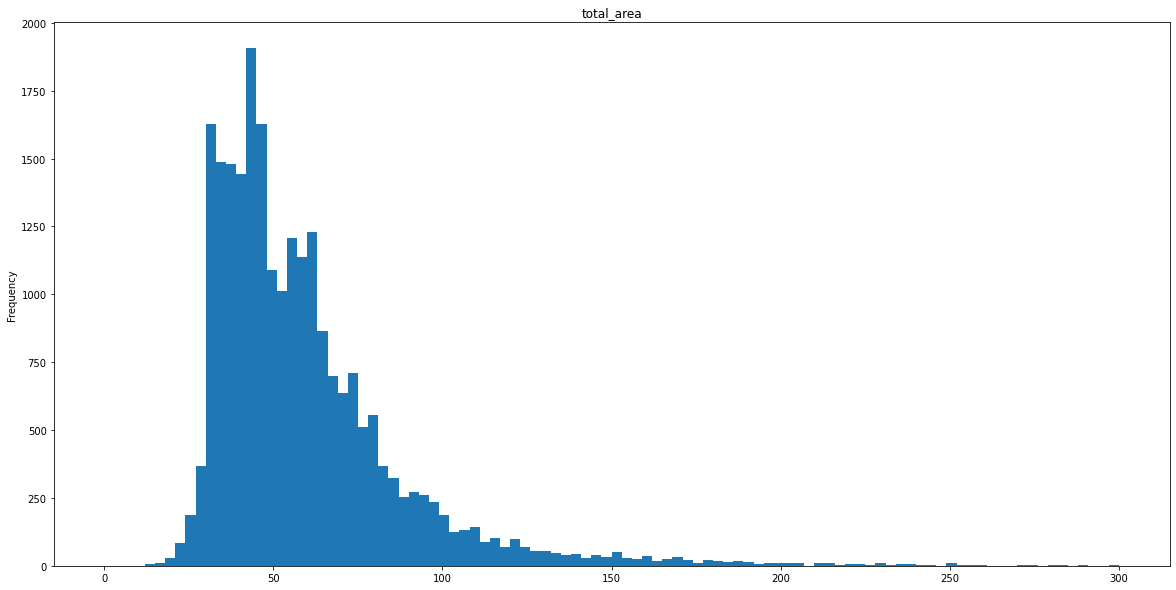

In [59]:
#просмотр данных total_area
data['total_area'].plot(range=(0,300), kind='hist', bins=100, title='total_area', figsize=(20,10))

Больше всего объявлений с площадью до 50 метров. Меньше всего от 200 м.

In [60]:
data['living_area'].describe()

count    23494.000000
mean        33.892601
std         19.494913
min         10.000000
25%         18.400000
50%         30.300000
75%         42.500000
max        200.000000
Name: living_area, dtype: float64

<AxesSubplot:title={'center':'living_area'}, ylabel='Frequency'>

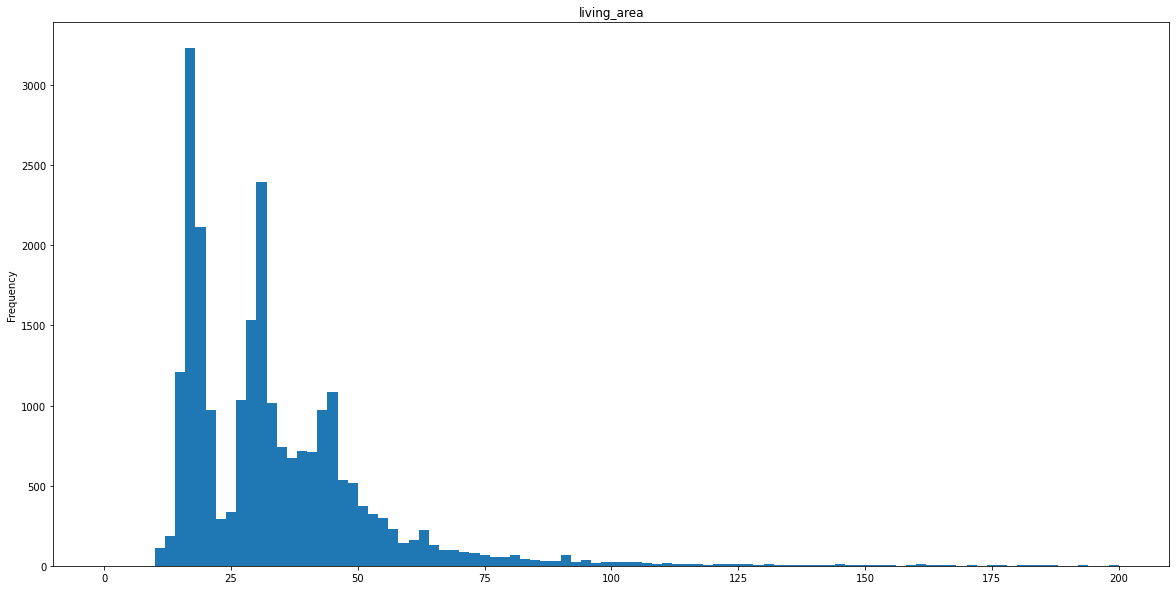

In [61]:
data['living_area'].plot(range=(0,200), kind='hist', bins=100, title='living_area', figsize=(20,10))

Видно, что больше всего квавртир до 25 метров, спад свыше 75.

In [62]:
data['kitchen_area'].describe()

count    23494.000000
mean        10.358313
std          5.372258
min          1.300000
25%          7.300000
50%          9.100000
75%         11.400000
max        107.000000
Name: kitchen_area, dtype: float64

<AxesSubplot:title={'center':'kitchen_area'}, ylabel='Frequency'>

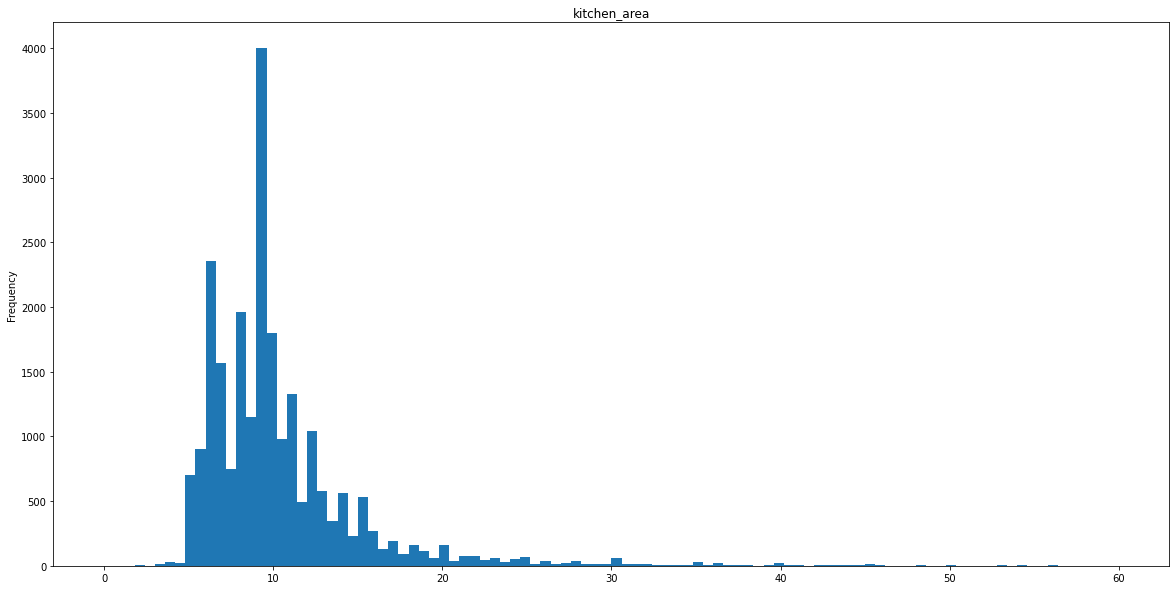

In [63]:
data['kitchen_area'].plot(range=(0,60), kind='hist', bins=100, title='kitchen_area', figsize=(20,10))

Больше всего кухонь до 10м, меньше всего где-то после 20.

In [64]:
data['last_price'].describe()

count    2.349400e+04
mean     6.195368e+06
std      6.159948e+06
min      1.219000e+04
25%      3.400000e+06
50%      4.628270e+06
75%      6.750000e+06
max      9.900000e+07
Name: last_price, dtype: float64

<AxesSubplot:title={'center':'last_price'}, ylabel='Frequency'>

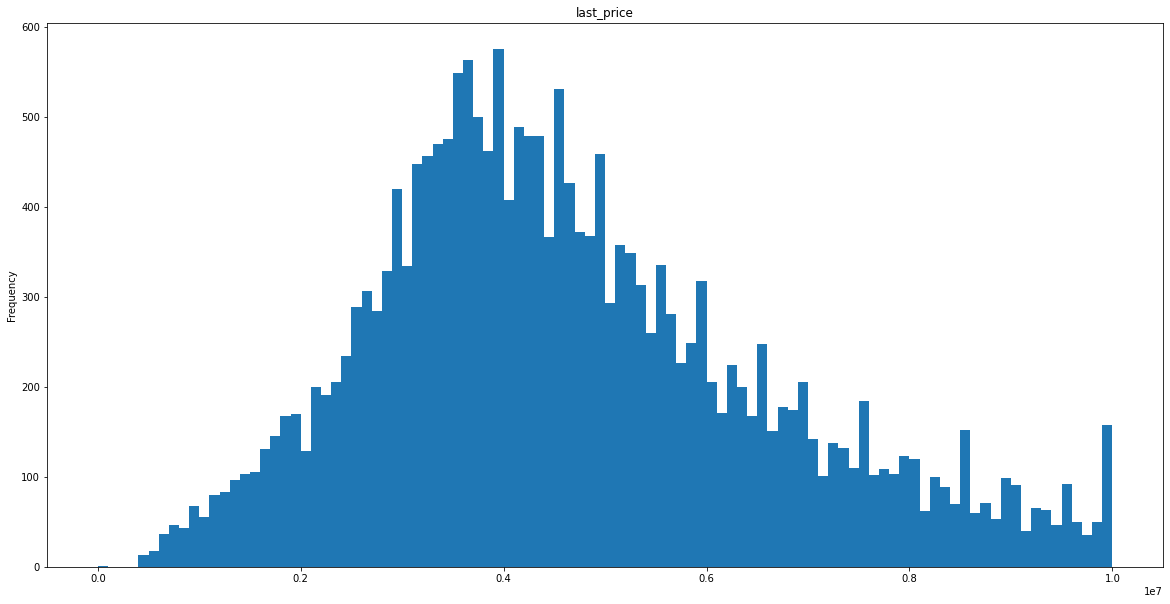

In [231]:
data['last_price'].plot(range=(0,1e+07), kind='hist', bins=100, title='last_price', figsize=(20,10))

Больше всего квартир по цене от 3 до 6 млн.

In [66]:
data['rooms'].describe()

count    23494.000000
mean         2.060356
std          1.049987
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         16.000000
Name: rooms, dtype: float64

<AxesSubplot:title={'center':'rooms'}, ylabel='Frequency'>

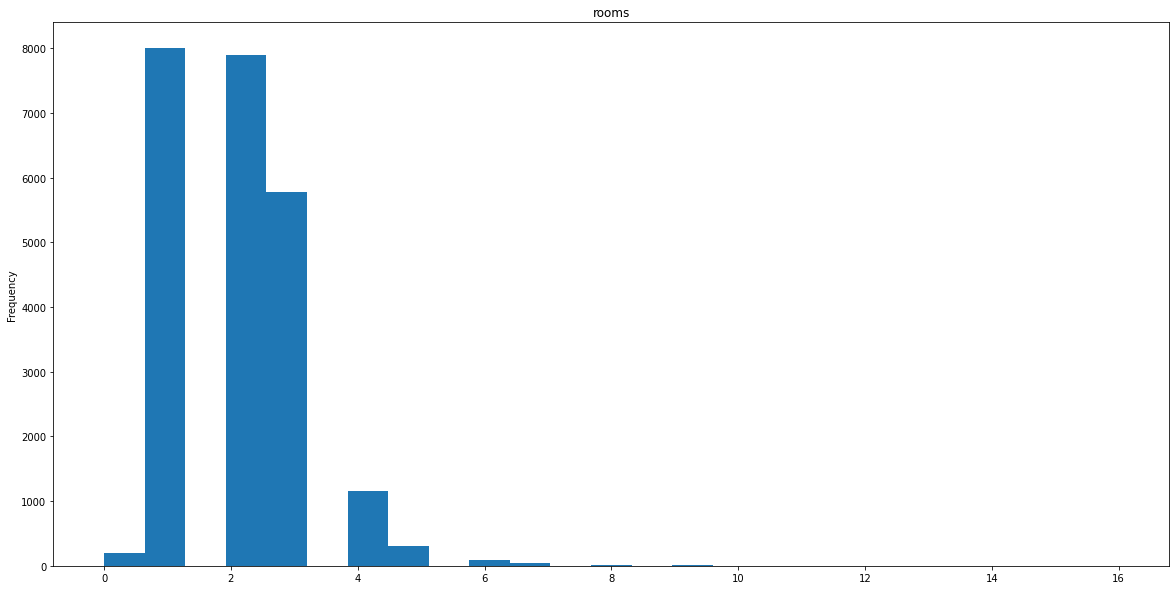

In [67]:
data['rooms'].plot(range=(0, 16), kind='hist', bins=25, title='rooms', figsize=(20,10))

Больше всего продаж 1, 2 и 3 комнатных. 

In [68]:
data['ceiling_height'].describe()

count    23494.000000
mean         2.693102
std          0.219439
min          2.500000
25%          2.550000
50%          2.600000
75%          2.750000
max          4.000000
Name: ceiling_height, dtype: float64

<AxesSubplot:title={'center':'ceiling_height'}, ylabel='Frequency'>

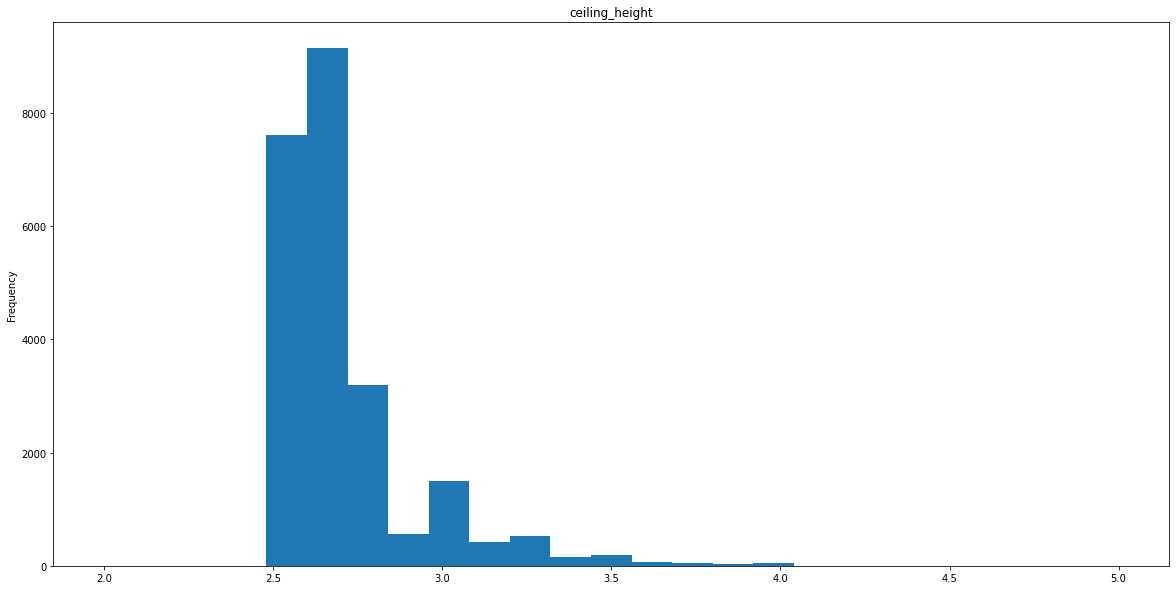

In [69]:
data['ceiling_height'].plot(range=(2, 5), kind='hist', bins=25, title='ceiling_height', figsize=(20,10))

Больше всего значений в пределах нормы 2,5-3,2 метров.

In [70]:
data['floor'].describe()

count    23494.000000
mean         5.898740
std          4.890214
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

<AxesSubplot:title={'center':'floor'}, ylabel='Frequency'>

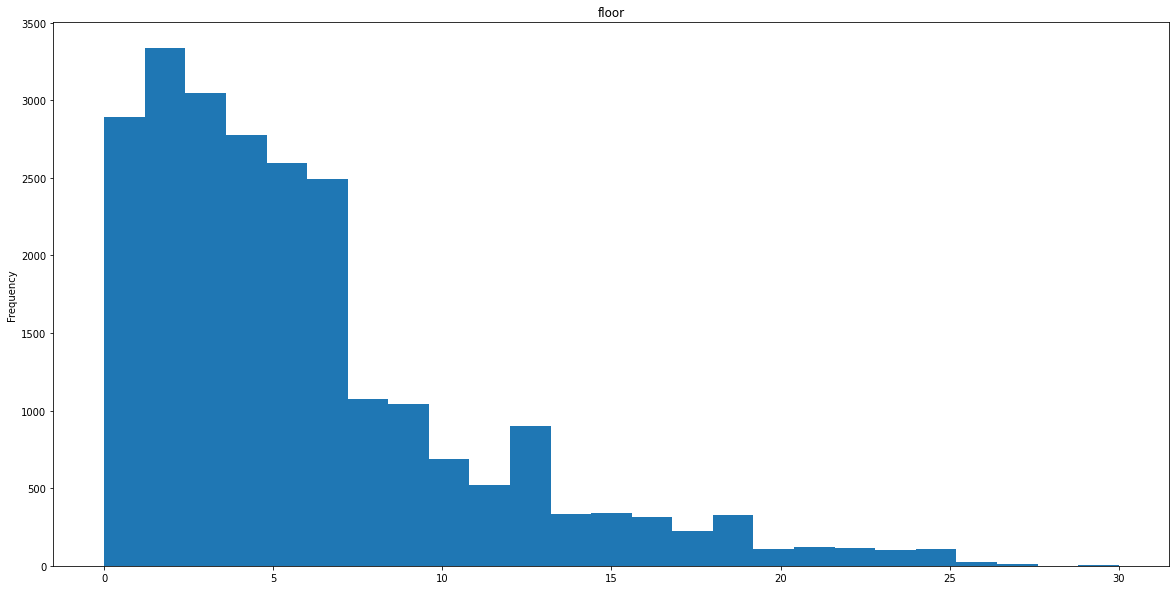

In [71]:
data['floor'].plot(range=(0, 30), kind='hist', bins=25, title='floor', figsize=(20,10))

Больше всего квартир продается до 7 этажа приблизительно.

In [72]:
data['floor_category'].describe()

count      23494
unique         3
top       другой
freq       17236
Name: floor_category, dtype: object

<AxesSubplot:xlabel='floor_category', ylabel='count'>

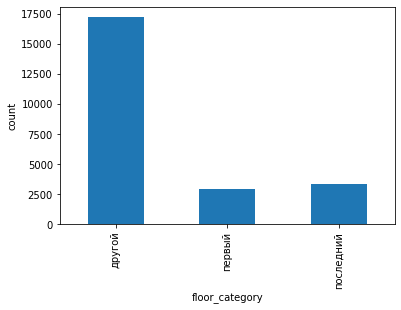

In [73]:
data.groupby('floor_category')['floor_category'].count().plot(kind='bar', ylabel='count')

Меньше всего первого этажа и последнего, больше всего других.

In [74]:
data['floors_total'].describe()

count    23494.000000
mean        10.696476
std          6.599347
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

<AxesSubplot:title={'center':'floors_total'}, ylabel='Frequency'>

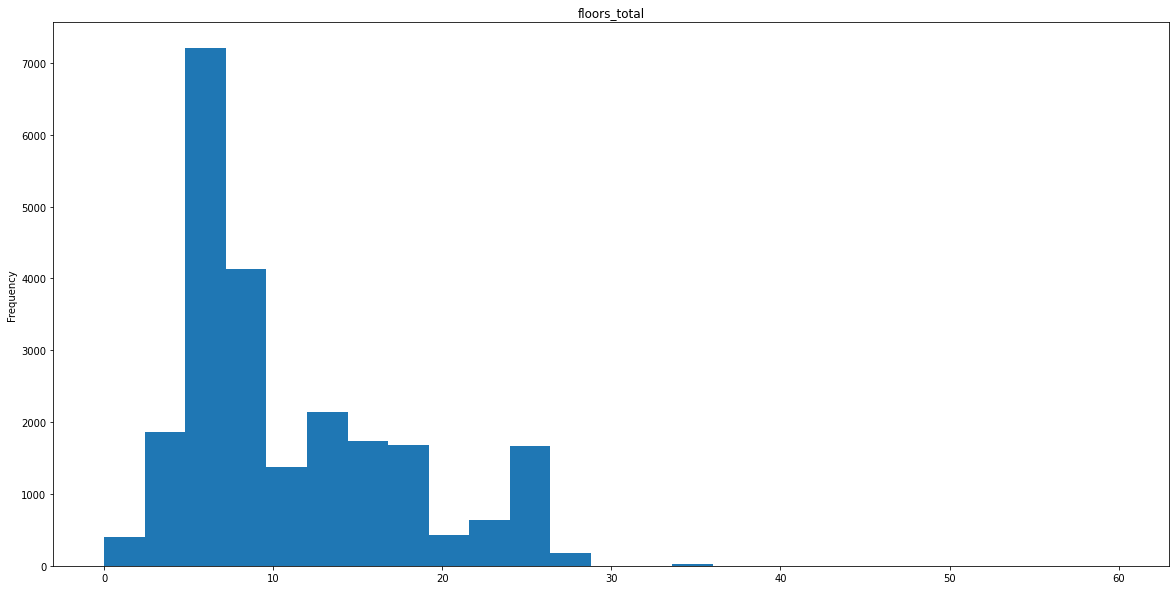

In [75]:
data['floors_total'].plot(range=(0, 60), kind='hist', bins=25, title='floors_total', figsize=(20,10))

Больше всего объявлений в пятиэтажках.

In [76]:
data['cityCenters_nearest'].describe()

count    23494.000000
mean     14252.863348
std       7678.228845
min        181.000000
25%      10983.000000
50%      13279.000000
75%      15758.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64

<AxesSubplot:title={'center':'cityCenters_nearest'}, ylabel='Frequency'>

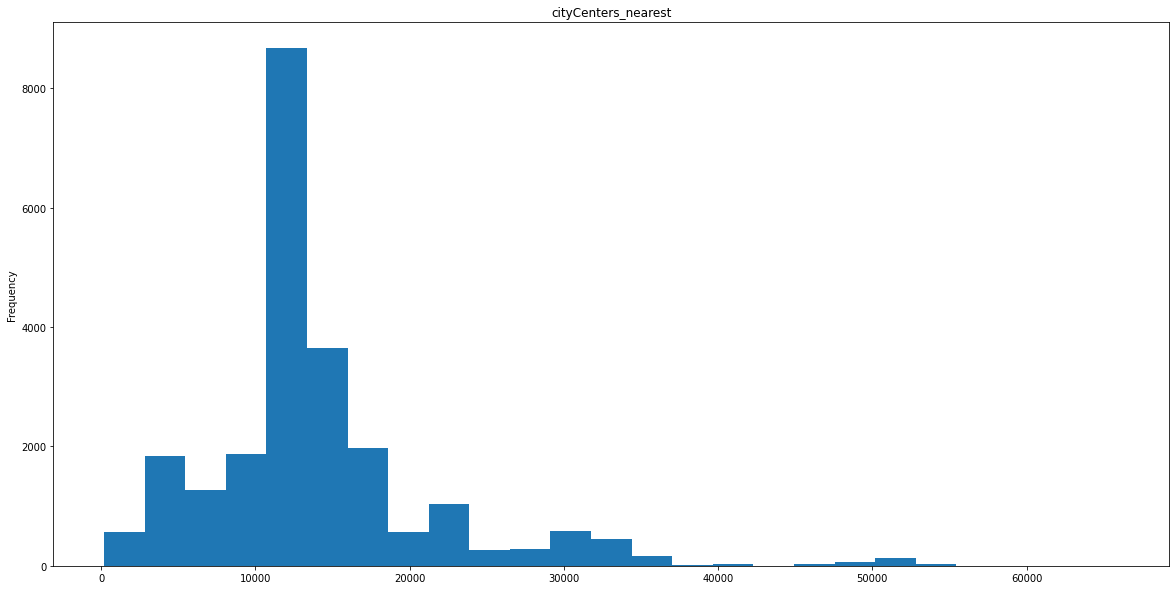

In [77]:
data['cityCenters_nearest'].plot(kind='hist', bins=25, title='cityCenters_nearest', figsize=(20,10))

Больше всего объявлений о квартирах в районе 11-15 км от центра

In [78]:
data['airports_nearest'].describe()

count    23494.000000
mean     23525.438814
std      16680.187497
min          0.000000
25%      11940.000000
50%      23121.000000
75%      35853.000000
max      84869.000000
Name: airports_nearest, dtype: float64

<AxesSubplot:title={'center':'airports_nearest'}, ylabel='Frequency'>

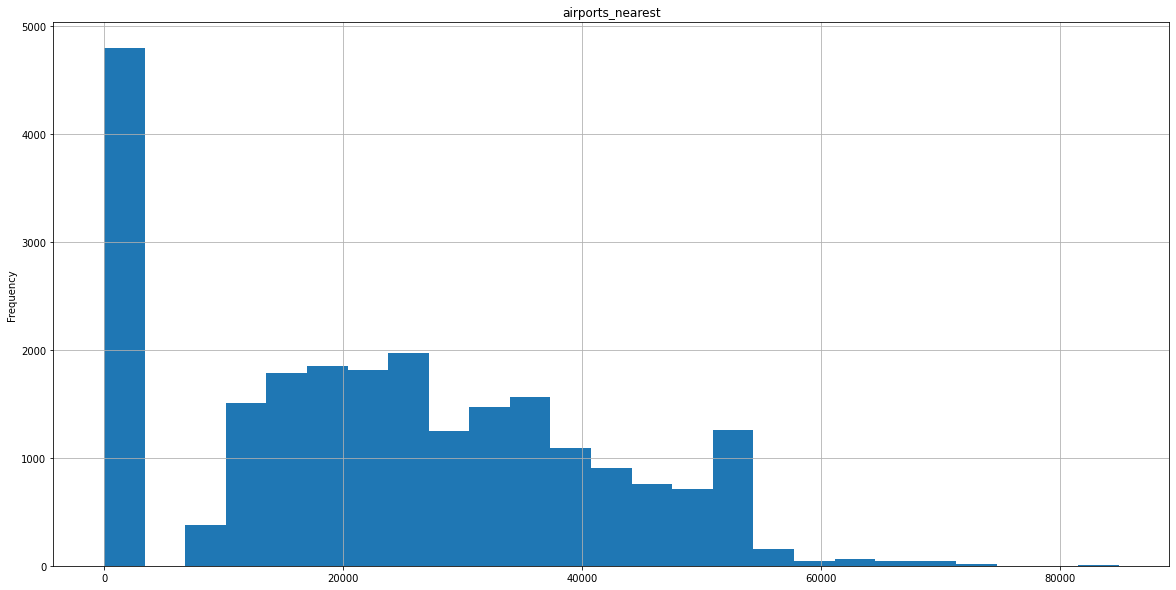

In [79]:
data['airports_nearest'].plot(bins=25, kind='hist', title='airports_nearest', figsize=(20,10), grid=True)

Больше всего объявлений вне аэропорта, после уже ближе к 20-23км от аэропорта.

In [80]:
data['parks_nearest'].describe()

count    23494.000000
mean       355.331510
std        290.340192
min          0.000000
25%          0.000000
50%        460.000000
75%        460.000000
max       3190.000000
Name: parks_nearest, dtype: float64

<AxesSubplot:title={'center':'parks_nearest'}, ylabel='Frequency'>

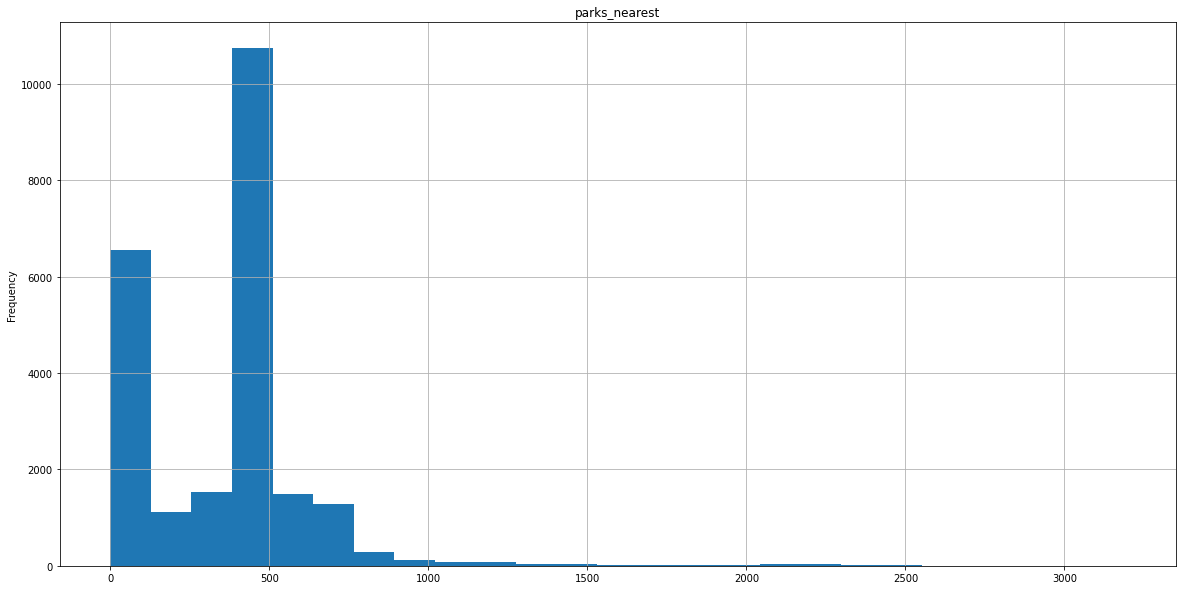

In [81]:
data['parks_nearest'].plot(bins=25, kind='hist', title='parks_nearest', figsize=(20,10), grid=True)

Большая часть имеет парк в пределах полукилометра или совсем не имеет его.

array([[<AxesSubplot:title={'center':'week_day'}>]], dtype=object)

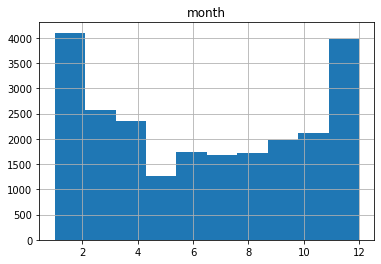

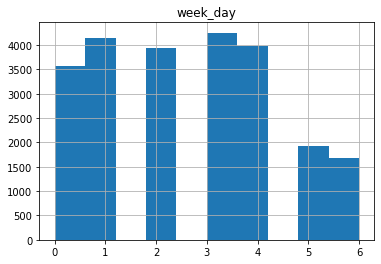

In [82]:
data.hist('month')
data.hist('week_day')

Пики объявлений приходятся на ноябрь-февраль, вторник и четверг самые загруженные дни. Меньше всего объявлений в выходные и в апреле месяце.

* **days_exposition**

In [83]:
data['days_exposition'].describe()

count    23494.000000
mean       156.409679
std        213.199675
min          1.000000
25%         22.000000
50%         73.000000
75%        198.000000
max       1580.000000
Name: days_exposition, dtype: float64

<AxesSubplot:title={'center':'days_exposition'}, ylabel='Frequency'>

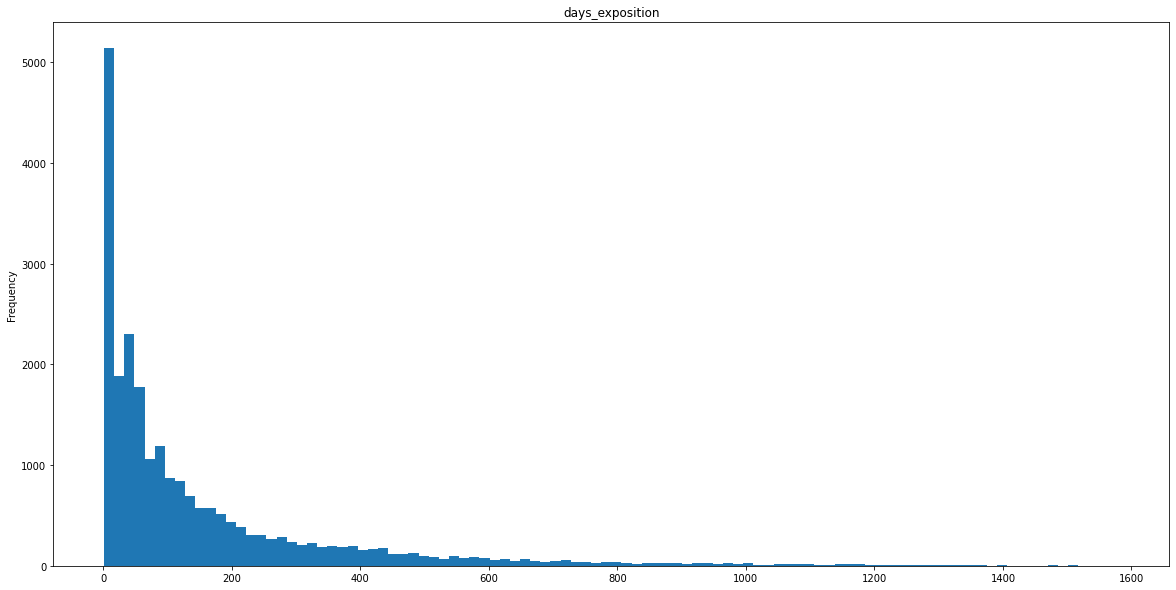

In [84]:
data['days_exposition'].plot(kind='hist', bins=100, figsize=(20,10), title='days_exposition')

In [85]:
print("median: ", data['days_exposition'].median())
print("mean: ", data['days_exposition'].mean())

median:  73.0
mean:  156.40967906699584


Среднее время продажи квартиры 157 дней. Медианное значение 73 дня. Но есть квартиры с очень долгим сроком продаж свыше года (максимум в 1580 дней, что свыше 4 лет). Возможно, быстрые продажи это до 73 дней, а долгие свыше 157 дней.

* **Какие факторы больше всего влияют на общую (полную) стоимость объекта?**

* Общая площадь (total_area)

<AxesSubplot:xlabel='total_area'>

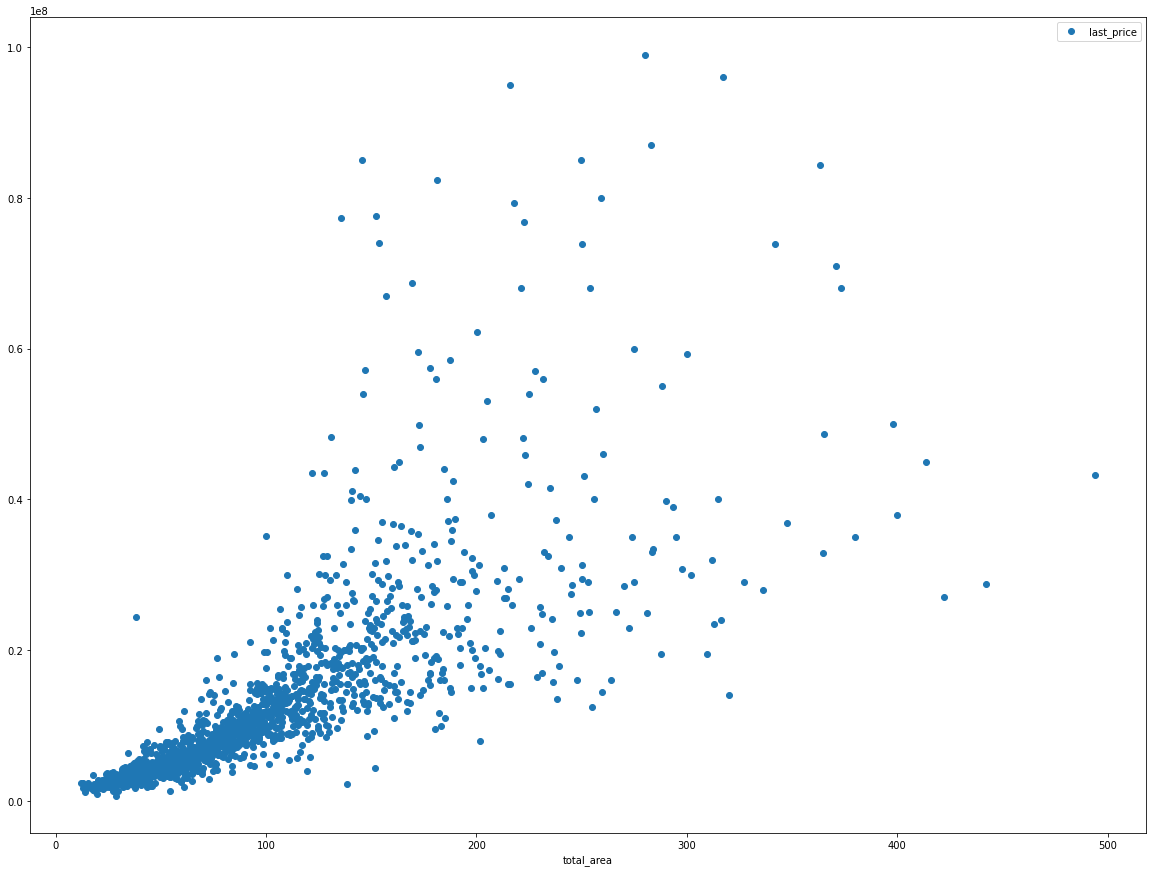

In [91]:
#построим таблицу, отсортируем ее и построим график
data.pivot_table(index='total_area', values='last_price').sort_values(by='last_price').plot(style='o', figsize=(20,15))

Пик цены приходится на квартиру около 300 метров, самое большое количество объявлений с метражом до 100 квадратов, цена в пределах 20 млн, постепенно растет в зависимости от метража. **Вывод: есть зависимость цены от общей площади.**

* Жилая площадь (living_area)

<AxesSubplot:xlabel='living_area'>

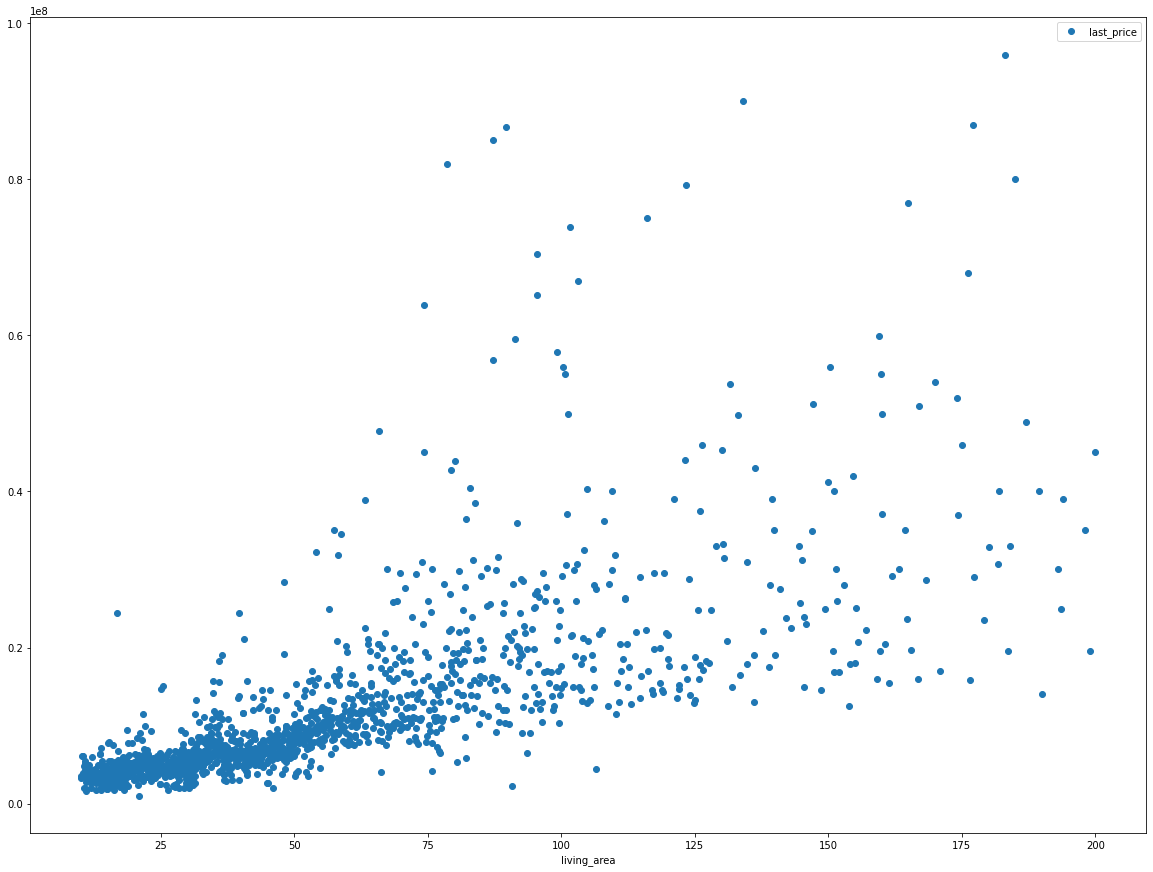

In [92]:
#построим таблицу, отсортируем ее и построим график
data.pivot_table(index='living_area', values='last_price').sort_values(by='last_price').plot(style='o', figsize=(20,15))

Пик цены приходится на квартиру до 200 метров, цены постепенно растут в зависимоти от площади, есть небольшие исключения, но тенденция одна. **Вывод: есть зависимость цены от жилой площади.**

* Площадь кухни (kitchen_area)

<AxesSubplot:xlabel='kitchen_area'>

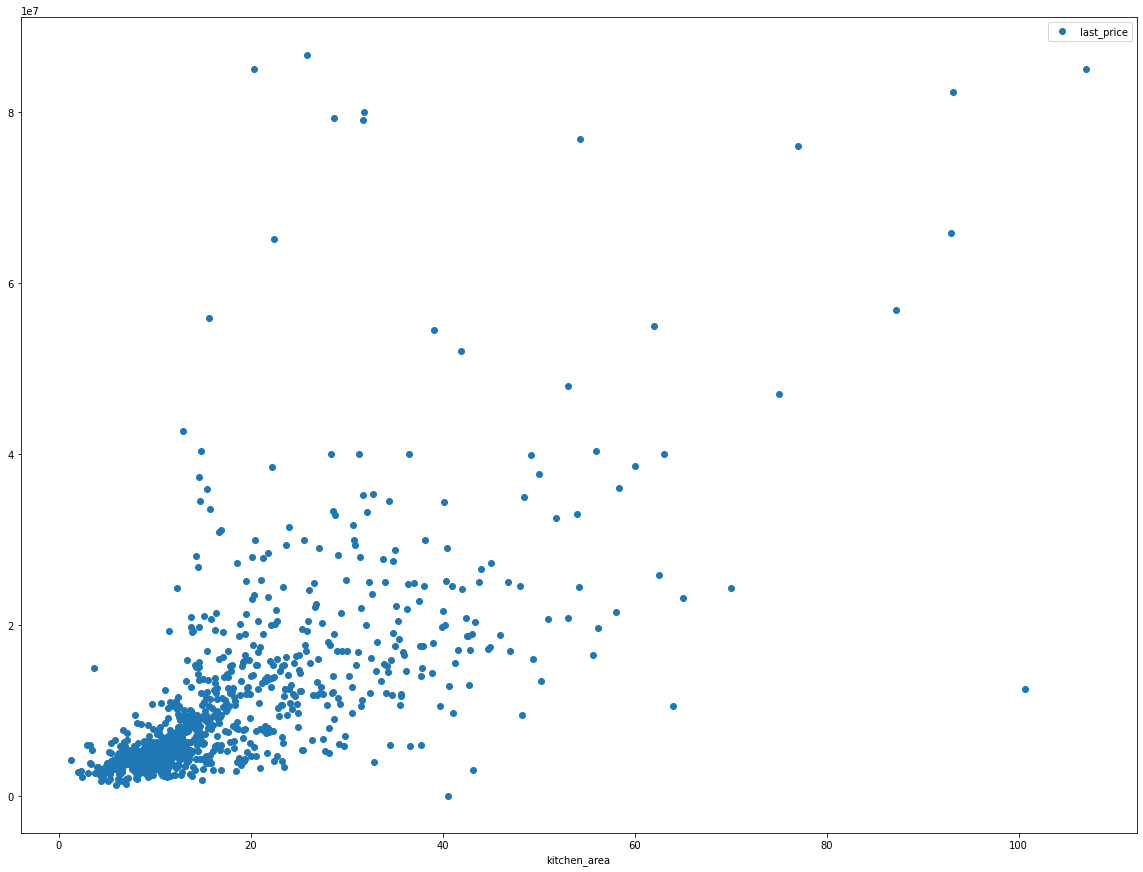

In [93]:
#построим таблицу, отсортируем ее и построим график
data.pivot_table(index='kitchen_area', values='last_price').sort_values(by='last_price').plot(style='o', figsize=(20,15))

Большая часть объявлений до 20 млн с площадью кухонь до 20 метров. Постепенно цена и метраж растут, некоторые разбросы есть, но тенденция наблюдается. Пик цены приходится на кухню свыше 100 метров и около 20-30 метров, на которые влияют, возможно, удаленность или другие факторы. Вывод:**Вывод: есть зависимость цены от площади кухни.**

* Количество комнат (rooms)

<AxesSubplot:xlabel='rooms'>

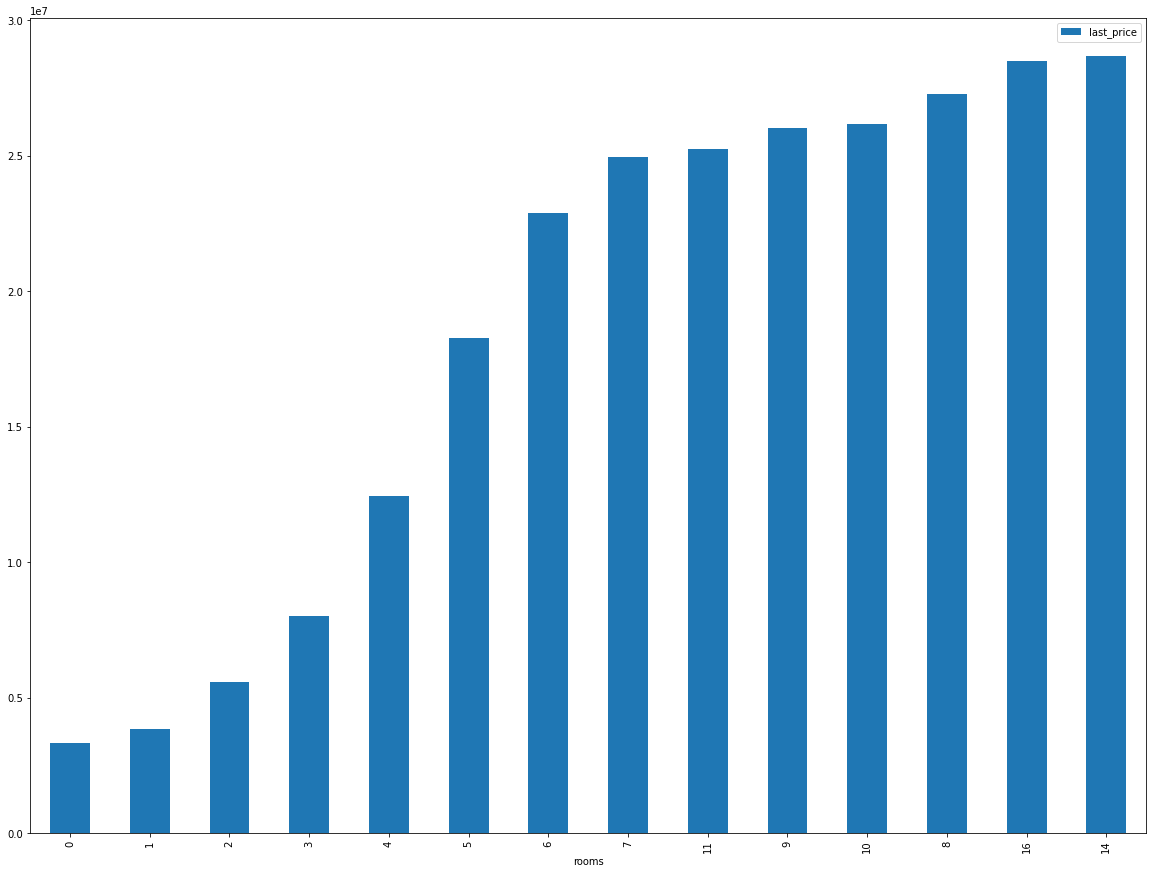

In [100]:
#построим таблицу, отсортируем ее и построим график
data.pivot_table(index='rooms', values='last_price').sort_values(by='last_price').plot(kind='bar', figsize=(20,15))

Здесь наблюдается прямая зависимость от цены. Пик цены у квартир с наибольшим количеством комнат. Чем больше комнат тем выше цены. **Вывод: есть зависимость цены от количества комнат.**

* Этаж, на котором расположена квартира (первый, последний, другой)(floor_category).

<AxesSubplot:xlabel='floor_category'>

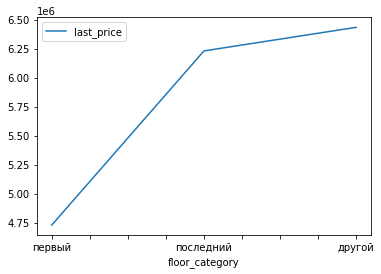

In [107]:
#построим таблицу, отсортируем ее и построим график
data.pivot_table(index='floor_category', values='last_price').sort_values(by='last_price').plot(kind='line')

Первые этажи дешевле всех, последние в среднечках, другие этажи самые дорогие. **Вывод: есть зависимость цены от типа этажа**

* Дата размещения (день недели, месяц, год) (week_day, month, year)

<AxesSubplot:xlabel='week_day'>

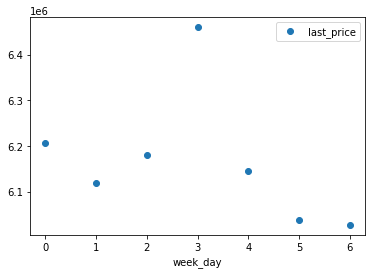

In [119]:
#построим таблицу, отсортируем ее и построим график
data.pivot_table(index='week_day', values='last_price').sort_values(by='last_price').plot(style='o')

Больше всего объявлений сделано в среду. Но как таковой зависимости цены от дня недели не видно.

<AxesSubplot:xlabel='month'>

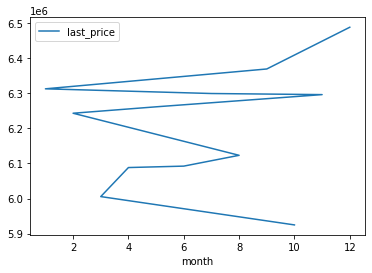

In [121]:
#построим таблицу, отсортируем ее и построим график
data.pivot_table(index='month', values='last_price').sort_values(by='last_price').plot(kind='line')

Зависимости цены от месяца публикации не видно.

<AxesSubplot:xlabel='year'>

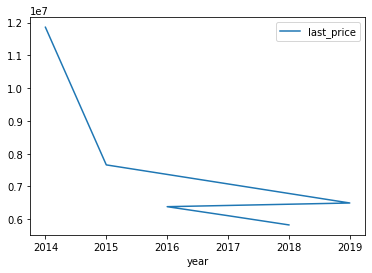

In [126]:
#построим таблицу, отсортируем ее и построим график
data.pivot_table(index='year', values='last_price').sort_values(by='last_price').plot(kind='line')

Наблюдается постепенное снижение цены в период 2014-2015 годов, после как таковая зависимость не наблюдается. **Вывод: зависимости цены от даты размещения объвяления не наблюдается.** 

* Посчитать среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений.

In [157]:
#топ 10 городов с наибольшим количеством объявлений и средняя цена за 1кв.метр по местности
data.groupby('locality_name')\
.agg(expo=('locality_name','count'), square_mean=('price_squaremetre','mean'))\
.sort_values(by='expo', ascending=False). head(10)

,expo,square_mean
locality_name,,
санкт-петербург,15616,113360.970047
поселок мурино,589,86061.676978
деревня кудрово,471,95326.179108
поселок шушары,439,78703.263349
всеволожск,396,68670.459621
пушкин,364,103054.545000
колпино,337,75443.972849
поселок парголово,326,90205.423374
гатчина,307,68746.146515


Наибольшее количество объявлений из Санкт-Петербурга в количестве 15616 штук, замыкает список  город Выборг с 234 объявлениями.

In [234]:
#топ 10 городов с наибольшим количеством объявлений
top_10 = data.groupby('locality_name')\
.agg(expo=('locality_name','count'), square_mean=('price_squaremetre','mean'))\
.sort_values(by='expo', ascending=False). head(10)

#сортировка по цене за 1 кв.м. по убыванию в топ-10 по объявлениям
top_10.sort_values(by='square_mean', ascending=False)

,expo,square_mean
locality_name,,
санкт-петербург,15616,113360.970047
пушкин,364,103054.545000
деревня кудрово,471,95326.179108
поселок парголово,326,90205.423374
поселок мурино,589,86061.676978
поселок шушары,439,78703.263349
колпино,337,75443.972849
гатчина,307,68746.146515
всеволожск,396,68670.459621


Наибольшая средняя цена за 1 кв.м в Санкт-Петербурге в топ-10 по объявлениям, в городе Выборг наименьшая средняя цена за 1 кв.м

* Квартиры в Санкт-Петербурге со средней ценой каждого километра.

<AxesSubplot:xlabel='cityCenters_nearest_km'>

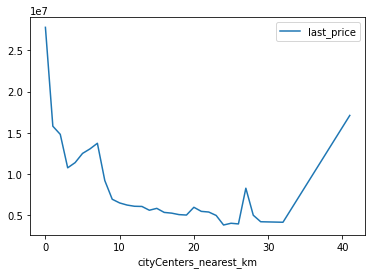

In [230]:
data[data['locality_name'] == 'санкт-петербург'].\
     pivot_table(index='cityCenters_nearest_km', values='last_price', aggfunc='mean').plot(kind='line')

Чем ближе к центру города тем цена выше. Чем дальше тем ниже.

### Общий вывод

В процессе исследования данных были выявлены следующие особенности:
* больше всего объявлений с общей площадью квартир до 50 кв.м.
* больше всего объявлений с кухней до 10 кв.м.
* больше всего объявлений от 3 до 6 млн.р.
* чаще всего продают квартиры на 1, 2 и 3 этажах по убыванию
* больше всего продается квартир со стандартной высотой потолков 2,5-3,2 м.
* больше всего объявлений о продаже квартир с 1-7 этаж.
* чаще всего встречаются объявления о продаже с типом этажа "другой"
* больше всего объявлений в 5 этажных домах
* больше всего объявлений квартир в 10-15 км от центра города.
* больше всего продаж вне аэропортов, 20-23 км.
* чаще всего есть парк рядом с квартирой (около 500м)
* больше всего объявлений в месяцы ноябрь-февраль по вторникам и четвергам, а меньше всего в выходные, с февраля по май наблюдается спад объявлений
* среднее время продаж находится в 157 днях. Быстрые продажи до 73 дней, долгие после 157 дней, самые долгие доходят до 4 лет

Было произведено исследование на предмет зависимости цены объекта недвижимости от разных факторов. 

Была выявлена зависимость от:
* общей площади квартиры
* жилой пощади квартиры
* площади кухни
* количества комнат
* от типа этажа

Зависимость от **дня, месяца и года размещения объявлений не найдена**.

Так же в ходе исследования был выделен Топ-10 городов по количеству объявлений. **Лидером стал *Санкт-Петербург (15616 штук)*, внизу *Выборг (234)***. 

**Лидером среди цен за 1 кв.метр по топ-10 так же стал *Санкт-Петербург (113360,97)*, наименьшая цена так же в *Выборге (58190,128162)***.

Так же было определено, что **чем ближе объект недвижимости к центру города Санкт-Петербург, тем он дороже**.